In [2]:
import os
import sys
import json
import datetime
import numpy as np
import skimage.draw
import cv2
from mrcnn.visualize import display_instances
from mrcnn.config import Config
from mrcnn import model as modellib, utils
import matplotlib.pyplot as plt
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.image as mpimg
from sklearn.model_selection import StratifiedKFold, KFold, train_test_split
import imgaug
import imgaug.augmenters as iaa
from mrcnn import utils
from mrcnn import visualize
from mrcnn.visualize import display_images
from mrcnn.visualize import display_instances
import mrcnn.model as modellib
from mrcnn.model import log
def get_ax(rows=1, cols=1, size=16):
  """Return a Matplotlib Axes array to be used in all visualizations in the notebook.  Provide a central point to control graph sizes. Adjust the size attribute to control how big to render images"""
  _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])

C:\Users\HP\.conda\envs\mrcnn4\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\HP\.conda\envs\mrcnn4\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\HP\.conda\envs\mrcnn4\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\HP\.conda\envs\mrcnn4\lib\site-packages\tensorflow\python\framework\dtypes.py:5

In [3]:
gpu_options = tf.GPUOptions(allow_growth=True)
session = tf.InteractiveSession(config=tf.ConfigProto(gpu_options=gpu_options)) # allocate memory for gpu
tf.device('/gpu:0') # check for gpu
Root_Dir=r"C:\Users\HP\Desktop\dental\DentalPanoramicXrays\boxed_images\10241024" #main directory where all files are present
sys.path.append(Root_Dir)
COCO_Weights_path=os.path.join(Root_Dir,"mask_rcnn_coco.h5") # pretrained weights for mask rcnn used to initialize the network
Default_Logs_Dir=os.path.join(Root_Dir,"logs")

# config of mask rcnn, hyperparameters set here
class CustomConfig(Config):
    NAME="object"
    IMAGES_PER_GPU=1
    NUM_CLASSES=32+1
    BACKBONE ='resnet50'
    STEPS_PER_EPOCH=907/(IMAGES_PER_GPU)
    VALIDATION_STEPS=261
    ROI_POSITIVE_RATIO = 0.334
    DETECTION_MIN_CONFIDENCE=0.7
    IMAGE_SHAPE=[1024,1024,3]
    IMAGE_MAX_DIM=1024
    LEARNING_RATE=0.001
    USE_MINI_MASK=True # AVOID DOWNSAMPLING to improve accuarcy. check if accuracy improves
    TRAIN_ROIS_PER_IMAGE=200 # REDUCE rois from 200 to 100 to improve runtime
    MAX_GT_INSTANCES=100 # reduce it from 100 to 50 to improve runtime
    #POST_NMS_ROIS_INFERENCE=500 #halving the vaue to reduce runtime
    #POST_NMS_ROIS_TRAINING=1000 # having the value to reduce runtime
    #PRE_NMS_LIMIT=3000 # halving the value to reduce runtime
    
    
    
config=CustomConfig()
config.display()
    


Configurations:
BACKBONE                       resnet50
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                45
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE          

In [4]:
#initialize dataset loader


class CustomDataset(utils.Dataset):

    def load_custom(self, dataset_dir,file, subset):
        """Load a subset of the Dog-Cat dataset.
        dataset_dir: Root directory of the dataset.
        subset: Subset to load: train or val
        """
        # Add classes. We have 32 classes to add.
        self.add_class("object",1,"1")
        self.add_class("object",2,"2")
        self.add_class("object",3,"3")
        self.add_class("object",4,"4")
        self.add_class("object",5,"5")
        self.add_class("object",6,"6")
        self.add_class("object",7,"7")
        self.add_class("object",8,"8")
        self.add_class("object",9,"9")
        self.add_class("object",10,"10")
        self.add_class("object",11,"11")
        self.add_class("object",12,"12")
        self.add_class("object",13,"13")
        self.add_class("object",14,"14")
        self.add_class("object",15,"15")
        self.add_class("object",16,"16")
        self.add_class("object",17,"17")
        self.add_class("object",18,"18")
        self.add_class("object",19,"19")
        self.add_class("object",20,"20")
        self.add_class("object",21,"21")
        self.add_class("object",22,"22")
        self.add_class("object",23,"23")
        self.add_class("object",24,"24")
        self.add_class("object",25,"25")
        self.add_class("object",26,"26")
        self.add_class("object",27,"27")
        self.add_class("object",28,"28")
        self.add_class("object",29,"29")
        self.add_class("object",30,"30")
        self.add_class("object",31,"31")
        self.add_class("object",32,"32")
        
        # Train or validation dataset?
        assert subset in ["train", "val"]
        dataset_dir = os.path.join(dataset_dir, subset)

        # Load annotations
        # VGG Image Annotator saves each image in the form:
        # { 'filename': '28503151_5b5b7ec140_b.jpg',
        #   'regions': {
        #       '0': {
        #           'region_attributes': {},
        #           'shape_attributes': {
        #               'all_points_x': [...],
        #               'all_points_y': [...],
        #               'name': 'polygon'}},
        #       ... more regions ...
        #   },
        #   'size': 100202
        # }
        # We mostly care about the x and y coordinates of each region
        annotations1=json.load(open(file))['_via_img_metadata']
        # print(annotations1)
        annotations = list(annotations1.values())  # don't need the dict keys

        # The VIA tool saves images in the JSON even if they don't have any
        # annotations. Skip unannotated images.
        annotations = [a for a in annotations if a['regions']]
        counter=0
        
        # Add images
        for a in annotations:
            # print(a)
            # Get the x, y coordinaets of points of the polygons that make up
            # the outline of each object instance. There are stores in the
            # shape_attributes (see json format above)
            polygons = [r['shape_attributes'] for r in a['regions']] 
            objects = [s['region_attributes']['tooth'] for s in a['regions']]
            print("objects:",objects)
            
            name_dict = {"1": 1,"2":2,"3":3,"4":4,"5":5,"6":6,"7":7,"8":8,"9":9,"10":10,"11":11,"12":12,"13":13,"14":14,"15":15,"16":16,"17":17,"18":18,"19":19,"20":20,"21":21,"22":22,"23":23,"24":24,"25":25,"26":26,"27":27,"28":28,"29":29,"30":30,"31":31,"32":32}
            # key = tuple(name_dict)
            num_ids = [name_dict[a] for a in objects]
     
            # num_ids = [int(n['Event']) for n in objects]
            # load_mask() needs the image size to convert polygons to masks.
            # Unfortunately, VIA doesn't include it in JSON, so we must read
            # the image. This is only managable since the dataset is tiny.
            print("numids",num_ids)
            counter=counter+1
            print(counter)
            image_path = os.path.join(dataset_dir, a['filename'])
            image = skimage.io.imread(image_path)
            height, width = image.shape[:2]

            self.add_image(
                "object",  ## for a single class just add the name here
                image_id=a['filename'],  # use file name as a unique image id
                path=image_path,
                width=width, height=height,
                polygons=polygons,
                num_ids=num_ids
                )

    def load_mask(self, image_id):
        """Generate instance masks for an image.
       Returns:
        masks: A bool array of shape [height, width, instance count] with
            one mask per instance.
        class_ids: a 1D array of class IDs of the instance masks.
        """
        # If not a Dog-Cat dataset image, delegate to parent class.
        image_info = self.image_info[image_id]
        if image_info["source"] != "object":
            return super(self.__class__, self).load_mask(image_id)

        # Convert polygons to a bitmap mask of shape
        # [height, width, instance_count]
        info = self.image_info[image_id]
        if info["source"] != "object":
            return super(self.__class__, self).load_mask(image_id)
        num_ids = info['num_ids']
        mask = np.zeros([info["height"], info["width"], len(info["polygons"])],
                        dtype=np.uint8)
        for i, p in enumerate(info["polygons"]):
            # Get indexes of pixels inside the polygon and set them to 1
        	rr, cc = skimage.draw.polygon(p['all_points_y'], p['all_points_x'])

        	mask[rr, cc, i] = 1

        # Return mask, and array of class IDs of each instance. Since we have
        
        # Map class names to class IDs.
        num_ids = np.array(num_ids, dtype=np.int32)
        return mask, num_ids #np.ones([mask.shape[-1]], dtype=np.int32)

    def image_reference(self, image_id):
        """Return the path of the image."""
        info = self.image_info[image_id]
        if info["source"] == "object":
            return info["path"]
        else:
            super(self.__class__, self).image_reference(image_id)
    def load_custom_K_fold(self, dataset_dir,file, subset, fold):
        # Add classes
        self.add_class("object",1,"1")
        self.add_class("object",2,"2")
        self.add_class("object",3,"3")
        self.add_class("object",4,"4")
        self.add_class("object",5,"5")
        self.add_class("object",6,"6")
        self.add_class("object",7,"7")
        self.add_class("object",8,"8")
        self.add_class("object",9,"9")
        self.add_class("object",10,"10")
        self.add_class("object",11,"11")
        self.add_class("object",12,"12")
        self.add_class("object",13,"13")
        self.add_class("object",14,"14")
        self.add_class("object",15,"15")
        self.add_class("object",16,"16")
        self.add_class("object",17,"17")
        self.add_class("object",18,"18")
        self.add_class("object",19,"19")
        self.add_class("object",20,"20")
        self.add_class("object",21,"21")
        self.add_class("object",22,"22")
        self.add_class("object",23,"23")
        self.add_class("object",24,"24")
        self.add_class("object",25,"25")
        self.add_class("object",26,"26")
        self.add_class("object",27,"27")
        self.add_class("object",28,"28")
        self.add_class("object",29,"29")
        self.add_class("object",30,"30")
        self.add_class("object",31,"31")
        self.add_class("object",32,"32")

        assert subset in ["train", "val"]
        dataset_dir = os.path.join(dataset_dir, 'train')        #split train folder to k-fold train and val

        N_Folds = 5
        
        annotations = []

        annotation =json.load(open(file))['_via_img_metadata']
        
        annotation = list(annotation.values())  # don't need the dict keys

        k_fold = KFold(n_splits = N_Folds, random_state = 42, shuffle = True)

        for i, (train, val) in enumerate(k_fold.split(annotation)):
            if subset == "train" and fold == i:
                for index in train:
                    annotations.append(annotation[index])

            elif subset == "val" and fold == i:
                for index in val:
                    annotations.append(annotation[index])

        annotations = [a for a in annotations if a['regions']]

        for a in annotations:
            # print(a)
            # Get the x, y coordinaets of points of the polygons that make up
            # the outline of each object instance. There are stores in the
            # shape_attributes (see json format above)
            polygons = [r['shape_attributes'] for r in a['regions']]
            objects = [s['region_attributes']['tooth'] for s in a['regions']]
            name_dict = {"1": 1,"2":2,"3":3,"4":4,"5":5,"6":6,"7":7,"8":8,"9":9,"10":10,"11":11,"12":12,"13":13,"14":14,"15":15,"16":16,"17":17,"18":18,"19":19,"20":20,"21":21,"22":22,"23":23,"24":24,"25":25,"26":26,"27":27,"28":28,"29":29,"30":30,"31":31,"32":32}
            num_ids = [name_dict[a] for a in objects]
            
            # load_mask() needs the image size to convert polygons to masks.
            # Unfortunately, VIA doesn't include it in JSON, so we must read
            # the image. This is only managable since the dataset is tiny.
            image_path = os.path.join(dataset_dir, a['filename'])
            if os.path.exists(image_path):
                image = skimage.io.imread(image_path)
                height, width = image.shape[:2]

                self.add_image(
                    "object",  ## for a single class just add the name here
                    image_id=a['filename'],  # use file name as a unique image id
                    path=image_path,
                    width=width, height=height,
                    polygons=polygons,
                    num_ids=num_ids)

In [4]:
dataset = CustomDataset()
dataset.load_custom(r"C:\Users\HP\Desktop\dental\DentalPanoramicXrays\boxed_images\10241024\33 class classification\dataset",
                                           r"C:\Users\HP\Desktop\dental\DentalPanoramicXrays\boxed_images\10241024\33 class classification\dataset\train\train.json", 
                                               "train")
dataset.prepare() 

objects: ['2', '3', '32', '31', '30', '17', '18', '15', '14', '19', '4', '5', '6', '29', '28', '27', '26', '25', '24', '23', '22', '21', '20', '13', '12', '11']
numids [2, 3, 32, 31, 30, 17, 18, 15, 14, 19, 4, 5, 6, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 13, 12, 11]
1
objects: ['2', '31', '15', '18', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29']
numids [2, 31, 15, 18, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
2
objects: ['2', '3', '32', '31', '4', '30', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29']
numids [2, 3, 32, 31, 4, 30, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
3
objects: ['2', '3', '31', '30', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29']
numids [2,

objects: ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32']
numids [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]
33
objects: ['2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '31', '32']
numids [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 31, 32]
34
objects: ['2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '16', '18', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31']
numids [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 18, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
35
objects: ['1', '2', '3', '5', '6', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '24', '24', '2

objects: ['1', '2', '4', '5', '6', '7', '8', '9', '10', '11', '13', '15', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32']
numids [1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 13, 15, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]
64
objects: ['1', '2', '3', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '17', '18', '31', '29', '28', '27', '26', '25', '24', '23', '22', '20', '21']
numids [1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17, 18, 31, 29, 28, 27, 26, 25, 24, 23, 22, 20, 21]
65
objects: ['2', '3', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '32', '31', '29', '28', '27', '26', '25', '24', '23', '22', '21', '20', '18', '17']
numids [2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 32, 31, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 18, 17]
66
objects: ['2', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '18', '29', '28', '27', '26', '25', '24', '23', '22', '21']
numids [2, 4, 5, 6

objects: ['2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '23']
numids [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 23]
97
objects: ['2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '18', '19', '20', '21', '22', '23', '24', '27', '28', '29', '31']
numids [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 18, 19, 20, 21, 22, 23, 24, 27, 28, 29, 31]
98
objects: ['1', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32']
numids [1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]
99
objects: ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '18', '20', '21', '22', '23', '24', '25', '26', '27', '28'

objects: ['2', '3', '4', '6', '7', '8', '9', '10', '11', '14', '15', '31', '30', '29', '27', '26', '25', '24', '23', '22', '20', '19', '18', '17', '32', '13']
numids [2, 3, 4, 6, 7, 8, 9, 10, 11, 14, 15, 31, 30, 29, 27, 26, 25, 24, 23, 22, 20, 19, 18, 17, 32, 13]
125
objects: ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32']
numids [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]
126
objects: ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32']
numids [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]
127
objects: ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '17

objects: ['2', '3', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32']
numids [2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]
159
objects: ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '32', '31', '30', '29', '28', '27', '26', '25', '24', '23', '22', '21', '20', '19', '18', '17']
numids [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17]
160
objects: ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32']
numids [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]
161
objects: ['2', '3', '4', '5', '6', '7', '8', '9', '9',

objects: ['2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32']
numids [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]
198
objects: ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32']
numids [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]
199
objects: ['2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32']
numids [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]
200
objects: ['2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '17', '18', '20', 

objects: ['2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32']
numids [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]
233
objects: ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '14', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32']
numids [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]
234
objects: ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32']
numids [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]
235
objects: ['2', '3', '4', '5', '6', '7', '8', '

objects: ['2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32']
numids [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]
265
objects: ['1', '2', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32']
numids [1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]
266
objects: ['2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '17', '18', '19', '20', '22', '23', '24', '25', '26', '27', '29', '30', '31', '32']
numids [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17, 18, 19, 20, 22, 23, 24, 25, 26, 27, 29, 30, 31, 32]
267
objects: ['1', '2', '3', '4', '6', '7', '8', '9', '10', '11', '13', '14', '15', '16', '18', '19', '20', '21', '2

objects: ['1', '2', '3', '6', '7', '8', '9', '10', '11', '13', '14', '15', '16', '17', '18', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31']
numids [1, 2, 3, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
296
objects: ['2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32']
numids [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]
297
objects: ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32']
numids [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]
298
objects: ['2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', 

objects: ['2', '3', '4', '5', '6', '7', '8', '9', '11', '12', '13', '14', '15', '16', '18', '19', '20', '21', '22', '24', '25', '26', '27', '28', '29', '30', '31']
numids [2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16, 18, 19, 20, 21, 22, 24, 25, 26, 27, 28, 29, 30, 31]
330
objects: ['2', '3', '4', '6', '7', '8', '9', '10', '11', '13', '14', '15', '16', '17', '18', '19', '20', '22', '23', '24', '25', '26', '27', '29', '30', '31', '32']
numids [2, 3, 4, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 22, 23, 24, 25, 26, 27, 29, 30, 31, 32]
331
objects: ['1', '2', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32']
numids [1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]
332
objects: ['2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '17', '18', '20', '21', '22', '23', '24', '25', '26', '27', '28'

objects: ['2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31']
numids [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
362
objects: ['2', '3', '4', '5', '6', '7', '8', '9', '10', '13', '14', '15', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '12', '11']
numids [2, 3, 4, 5, 6, 7, 8, 9, 10, 13, 14, 15, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 12, 11]
363
objects: ['2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32']
numids [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]
364
objects: ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '18',

objects: ['2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '18', '19', '20', '21', '22', '23', '24', '22', '23', '24', '25', '26', '27', '28']
numids [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 18, 19, 20, 21, 22, 23, 24, 22, 23, 24, 25, 26, 27, 28]
398
objects: ['2', '3', '4', '8', '9', '10', '13', '14', '15', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '31', '5', '6', '7', '11', '12']
numids [2, 3, 4, 8, 9, 10, 13, 14, 15, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 31, 5, 6, 7, 11, 12]
399
objects: ['2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31']
numids [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
400
objects: ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27',

objects: ['1', '2', '3', '4', '5', '6', '7', '9', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '26', '27', '28', '29', '30', '31', '32', '25']
numids [1, 2, 3, 4, 5, 6, 7, 9, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 26, 27, 28, 29, 30, 31, 32, 25]
434
objects: ['2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '30', '31']
numids [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 31]
435
objects: ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32']
numids [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]
436
objects: ['2', '3', '5', '6', '7', '8', '9', '10', '11', '12', '14', '15', '17', '18', '20', '23

objects: ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32']
numids [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]
465
objects: ['2', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31']
numids [2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
466
objects: ['2', '3', '4', '6', '7', '8', '9', '10', '11', '13', '14', '15', '18', '19', '20', '22', '23', '24', '25', '26', '27', '29', '30', '31']
numids [2, 3, 4, 6, 7, 8, 9, 10, 11, 13, 14, 15, 18, 19, 20, 22, 23, 24, 25, 26, 27, 29, 30, 31]
467
objects: ['2', '3', '5', '6', '7', '8', '9', '11', '12', '13', '14', '15', '16', '18', '19', '20', '21', '22', '23', '24', '25', '26', '28', '29', '30

objects: ['2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31']
numids [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
498
objects: ['2', '5', '6', '7', '8', '9', '10', '11', '12', '14', '15', '16', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '31', '32']
numids [2, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 31, 32]
499
objects: ['2', '3', '4', '5', '6', '7', '11', '12', '13', '14', '15', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31']
numids [2, 3, 4, 5, 6, 7, 11, 12, 13, 14, 15, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
500
objects: ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32

objects: ['2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32']
numids [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]
529
objects: ['1', '2', '3', '4', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32']
numids [1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]
530
objects: ['2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '17', '18', '19', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31']
numids [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17, 18, 19, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
531
objects: ['2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', 

numids [1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 6]
559
objects: ['2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31']
numids [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
560
objects: ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31']
numids [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
561
objects: ['2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32']
numids [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 18, 19, 20, 21, 22, 23, 24, 25, 26, 2

590
objects: ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '31', '32']
numids [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 31, 32]
591
objects: ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32']
numids [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]
592
objects: ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32']
numids [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]
593
objects: ['1', '2', '3', '4', '5', '6', '7', '8', '9', '11', '11

objects: ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32']
numids [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]
621
objects: ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32']
numids [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]
622
objects: ['2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '18', '19', '20', '21', '22', '23', '23', '24', '25', '26', '27', '28', '29', '30', '31']
numids [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 18, 19, 20, 21, 22, 23, 23, 24, 25, 26, 27, 28, 29, 30, 31]
623
objects: ['1', '2', '3', '4', '5', '6', '7', '8', '9', '

objects: ['2', '3', '4', '6', '5', '7', '8', '9', '10', '11', '12', '16', '18', '19', '20', '21', '22', '23', '24', '25', '28', '29', '30', '32', '27']
numids [2, 3, 4, 6, 5, 7, 8, 9, 10, 11, 12, 16, 18, 19, 20, 21, 22, 23, 24, 25, 28, 29, 30, 32, 27]
653
objects: ['2', '3', '4', '6', '7', '8', '9', '10', '11', '12', '15', '18', '19', '20', '22', '23', '24', '25', '26', '27', '29', '30', '31']
numids [2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 15, 18, 19, 20, 22, 23, 24, 25, 26, 27, 29, 30, 31]
654
objects: ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32']
numids [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]
655
objects: ['1', '2', '3', '4', '5', '6', '7', '8', '9', '11', '12', '14', '15', '16', '17', '18', '19', '20', '22', '23', '24', '25', '26', '27', '28', '30', '31', '32']
numids [1, 2,

objects: ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31']
numids [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
691
objects: ['1', '2', '3', '4', '5', '6', '7', '8', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32']
numids [1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]
692
objects: ['2', '3', '5', '6', '7', '8', '9', '10', '11', '13', '14', '15', '18', '19', '20', '22', '23', '24', '25', '26', '27', '29', '30', '31']
numids [2, 3, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 18, 19, 20, 22, 23, 24, 25, 26, 27, 29, 30, 31]
693
objects: ['1', '2', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '15', '18', '20', '21', '22', '23', '24', '25', '26', '27'

objects: ['3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '15', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29']
numids [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
721
objects: ['3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '31', '32']
numids [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 31, 32]
722
objects: ['1', '2', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '3', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32']
numids [1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 3, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]
723
objects: ['2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '27', '28', '3

objects: ['1', '2', '3', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32']
numids [1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]
754
objects: ['2', '3', '4', '5', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32']
numids [2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]
755
objects: ['2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31']
numids [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
756
objects: ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15',

objects: ['2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31']
numids [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
785
objects: ['2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31']
numids [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
786
objects: ['2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31']
numids [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
787
objects: ['1', '2', '3', '4', '5', '6', '8', '9', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '2

objects: ['2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31']
numids [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
817
objects: ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32']
numids [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]
818
objects: ['2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31']
numids [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
819
objects: ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '

objects: ['2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '31']
numids [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 31]
849
objects: ['3', '4', '5', '6', '7', '8', '9', '10', '11', '13', '14', '18', '19', '21', '22', '23', '24', '25', '26', '27', '28', '30', '31']
numids [3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 18, 19, 21, 22, 23, 24, 25, 26, 27, 28, 30, 31]
850
objects: ['2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '13', '14', '15', '18', '22', '23', '24', '25', '26', '27', '30', '31']
numids [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 18, 22, 23, 24, 25, 26, 27, 30, 31]
851
objects: ['1', '2', '3', '4', '6', '8', '9', '10', '12', '13', '15', '16', '17', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '31', '32']
numids [1, 2, 3, 4, 6, 8, 9, 10, 12, 13, 15, 16, 17, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 31, 32]
852
ob

objects: ['2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31']
numids [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
880
objects: ['2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32']
numids [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]
881
objects: ['2', '5', '6', '11', '12', '14', '15', '22', '23', '24', '25', '26', '27', '28', '31']
numids [2, 5, 6, 11, 12, 14, 15, 22, 23, 24, 25, 26, 27, 28, 31]
882
objects: ['3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '18', '20', '21', '22', '23', '24', '25', '26', '27', '28']
numids [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 18, 20, 21, 22, 23, 24, 25, 26, 27, 28]
883
obje

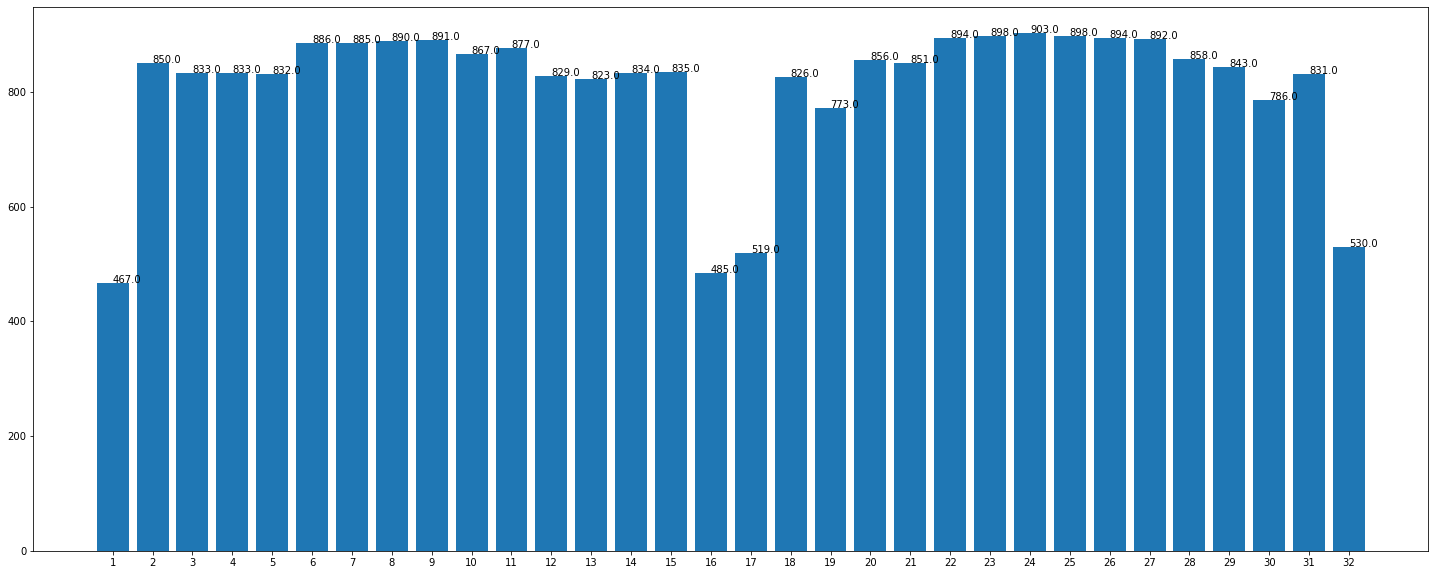

In [5]:
image_ids= dataset.image_ids
a1=[]
a2=[]
a3=[]
a4=[]
a5=[]
a6=[]
a7=[]
a8=[]
a9=[]
a10=[]
a11=[]
a12=[]
a13=[]
a14=[]
a15=[]
a16=[]
a17=[]
a18=[]
a19=[]
a20=[]
a21=[]
a22=[]
a23=[]
a24=[]
a25=[]
a26=[]
a27=[]
a28=[]
a29=[]
a30=[]
a31=[]
a32=[]

for id in image_ids:
    mask,class_ids=dataset.load_mask(id)
    a1=np.append(a1,np.count_nonzero(class_ids==1))
    a2=np.append(a2,np.count_nonzero(class_ids==2))
    a3=np.append(a3,np.count_nonzero(class_ids==3))
    a4=np.append(a4,np.count_nonzero(class_ids==4))
    a5=np.append(a5,np.count_nonzero(class_ids==5))
    a6=np.append(a6,np.count_nonzero(class_ids==6))
    a7=np.append(a7,np.count_nonzero(class_ids==7))
    a8=np.append(a8,np.count_nonzero(class_ids==8))
    a9=np.append(a9,np.count_nonzero(class_ids==9))
    a10=np.append(a10,np.count_nonzero(class_ids==10))
    a11=np.append(a11,np.count_nonzero(class_ids==11))
    a12=np.append(a12,np.count_nonzero(class_ids==12))
    a13=np.append(a13,np.count_nonzero(class_ids==13))
    a14=np.append(a14,np.count_nonzero(class_ids==14))
    a15=np.append(a15,np.count_nonzero(class_ids==15))
    a16=np.append(a16,np.count_nonzero(class_ids==16))
    a17=np.append(a17,np.count_nonzero(class_ids==17))
    a18=np.append(a18,np.count_nonzero(class_ids==18))
    a19=np.append(a19,np.count_nonzero(class_ids==19))
    a20=np.append(a20,np.count_nonzero(class_ids==20))
    a21=np.append(a21,np.count_nonzero(class_ids==21))
    a22=np.append(a22,np.count_nonzero(class_ids==22))
    a23=np.append(a23,np.count_nonzero(class_ids==23))
    a24=np.append(a24,np.count_nonzero(class_ids==24))
    a25=np.append(a25,np.count_nonzero(class_ids==25))
    a26=np.append(a26,np.count_nonzero(class_ids==26))
    a27=np.append(a27,np.count_nonzero(class_ids==27))
    a28=np.append(a28,np.count_nonzero(class_ids==28))
    a29=np.append(a29,np.count_nonzero(class_ids==29))
    a30=np.append(a30,np.count_nonzero(class_ids==30))
    a31=np.append(a31,np.count_nonzero(class_ids==31))
    a32=np.append(a32,np.count_nonzero(class_ids==32))
    

a1=np.sum(a1) #impaction
a2=np.sum(a2) #caries
a3=np.sum(a3) #shadow
a4=np.sum(a4) #bone loss
a5=np.sum(a5) # bridge
a6=np.sum(a6) #bdr
a7=np.sum(a7) #periapical
a8=np.sum(a8) #rct
a9=np.sum(a9) #crown
a10=np.sum(a10) #filling
a11=np.sum(a11)
a12=np.sum(a12)
a13=np.sum(a13)
a14=np.sum(a14)
a15=np.sum(a15)
a16=np.sum(a16)
a17=np.sum(a17)
a18=np.sum(a18)
a19=np.sum(a19)
a20=np.sum(a20)
a21=np.sum(a21)
a22=np.sum(a22)
a23=np.sum(a23)
a24=np.sum(a24)
a25=np.sum(a25)
a26=np.sum(a26)
a27=np.sum(a27)
a28=np.sum(a28)
a29=np.sum(a29)
a30=np.sum(a30)
a31=np.sum(a31)
a32=np.sum(a32)
a=[a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14,a15,a16,a17,a18,a19,a20,a21,a22,a23,a24,a25,a26,a27,a28,a29,a30,a31,a32]
class_names=['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31','32']


fig, ax = plt.subplots(figsize=(25,10))


plt.bar(class_names,a)
addlabels(class_names,a)

In [6]:
dataset = CustomDataset()
dataset.load_custom(r"C:\Users\HP\Desktop\dental\DentalPanoramicXrays\boxed_images\10241024\33 class classification\dataset",
                                           r"C:\Users\HP\Desktop\dental\DentalPanoramicXrays\boxed_images\10241024\33 class classification\dataset\val\val.json", 
                                               "val")
dataset.prepare() 

objects: ['1', '2', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29']
numids [1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
1
objects: ['2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '14', '15', '18', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29']
numids [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 18, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
2
objects: ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '32', '31', '30', '29', '28', '27', '26', '25', '24', '23', '22', '21', '17', '18', '19', '20']
numids [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 17, 18, 19, 20]
3
objects: ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '14', '15', '16', '13', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32

objects: ['2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '31', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30']
numids [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 31, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
34
objects: ['1', '2', '3', '4', '5', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '25', '26', '27', '28', '29', '30', '31', '32']
numids [1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 26, 27, 28, 29, 30, 31, 32]
35
objects: ['1', '2', '4', '5', '6', '7', '8', '9', '10', '11', '13', '15', '32', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31']
numids [1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 13, 15, 32, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
36
objects: ['2', '3', '5', '6', '7', '8', '9', '10', '12', '15', '18', '19', '21', '22', '23', '24', '25', '26', '27', '28', '2

objects: ['2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31']
numids [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
66
objects: ['2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32']
numids [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]
67
objects: ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32']
numids [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]
68
objects: ['1', '2', '3', '4', '6', '7', '8', '9', '10', '11', '12', '14', '15

101
objects: ['19', '20', '21', '22', '27', '28', '29', '30']
numids [19, 20, 21, 22, 27, 28, 29, 30]
102
objects: ['6', '7', '9', '10', '11', '18', '19', '20', '21', '22', '23', '24', '25', '27', '28', '29', '30', '31', '32']
numids [6, 7, 9, 10, 11, 18, 19, 20, 21, 22, 23, 24, 25, 27, 28, 29, 30, 31, 32]
103
objects: ['2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31']
numids [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
104
objects: ['2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32']
numids [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]
105
objects: ['1', '2', '4', '5', '6', '8', '9', '10', '11', '13', '17', '19', '20', '21', '22', '23', '26', '

objects: ['1', '2', '3', '4', '5', '6', '8', '9', '10', '12', '13', '14', '15', '16', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32']
numids [1, 2, 3, 4, 5, 6, 8, 9, 10, 12, 13, 14, 15, 16, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]
132
objects: ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32']
numids [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]
133
objects: ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32']
numids [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]
134
objects: ['2', '3', '6', '7', '8', '9', '10', '11', '12'

objects: ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32']
numids [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]
165
objects: ['1', '2', '3', '4', '5', '6', '7', '9', '11', '11', '12', '13', '14', '15', '16', '17', '18', '20', '21', '22', '23', '26', '27', '28', '29', '30', '31', '32', '8', '24', '25']
numids [1, 2, 3, 4, 5, 6, 7, 9, 11, 11, 12, 13, 14, 15, 16, 17, 18, 20, 21, 22, 23, 26, 27, 28, 29, 30, 31, 32, 8, 24, 25]
166
objects: ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '14', '15', '16', '18', '19', '20', '21', '24', '25', '26', '27', '28', '29', '30', '31', '32', '22', '23']
numids [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 18, 19, 20, 21, 24, 25, 26, 27, 28, 29, 30, 31, 32, 22, 23]
167
objects: ['6', '7', '8', '9', '10', '11', '14', '17', '21', '22', '2

objects: ['2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32']
numids [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]
197
objects: ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '22', '23', '24', '25', '26', '27', '29', '30', '31', '32']
numids [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22, 23, 24, 25, 26, 27, 29, 30, 31, 32]
198
objects: ['1', '2', '3', '4', '5', '6', '7', '9', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '31', '32']
numids [1, 2, 3, 4, 5, 6, 7, 9, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 31, 32]
199
objects: ['2', '3', '4', '5', '6', '8', '9', '10', '11', '12', '13', '14', '

objects: ['5', '6', '8', '11', '12', '22', '23', '24', '25', '26', '27']
numids [5, 6, 8, 11, 12, 22, 23, 24, 25, 26, 27]
229
objects: ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32']
numids [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]
230
objects: ['2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '17', '32']
numids [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 17, 32]
231
objects: ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32']
numids [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16

objects: ['2', '3', '3', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '18', '22', '23', '24', '25', '26', '27', '31']
numids [2, 3, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 18, 22, 23, 24, 25, 26, 27, 31]
261


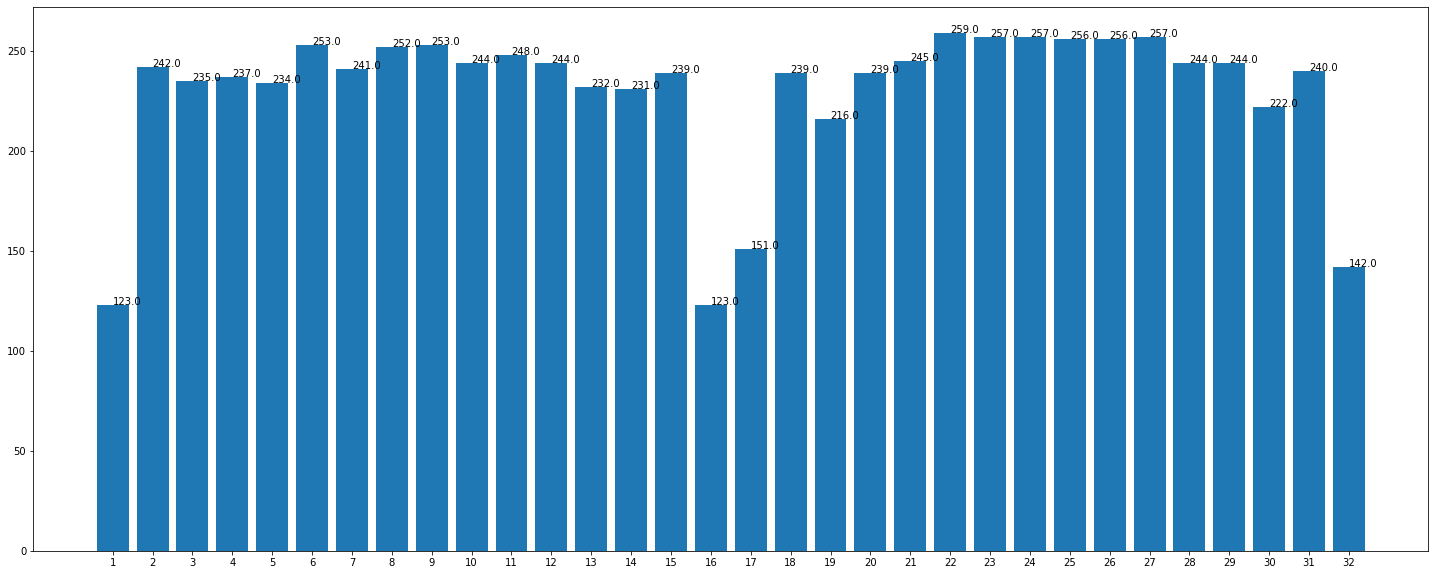

In [7]:
image_ids= dataset.image_ids
a1=[]
a2=[]
a3=[]
a4=[]
a5=[]
a6=[]
a7=[]
a8=[]
a9=[]
a10=[]
a11=[]
a12=[]
a13=[]
a14=[]
a15=[]
a16=[]
a17=[]
a18=[]
a19=[]
a20=[]
a21=[]
a22=[]
a23=[]
a24=[]
a25=[]
a26=[]
a27=[]
a28=[]
a29=[]
a30=[]
a31=[]
a32=[]

for id in image_ids:
    mask,class_ids=dataset.load_mask(id)
    a1=np.append(a1,np.count_nonzero(class_ids==1))
    a2=np.append(a2,np.count_nonzero(class_ids==2))
    a3=np.append(a3,np.count_nonzero(class_ids==3))
    a4=np.append(a4,np.count_nonzero(class_ids==4))
    a5=np.append(a5,np.count_nonzero(class_ids==5))
    a6=np.append(a6,np.count_nonzero(class_ids==6))
    a7=np.append(a7,np.count_nonzero(class_ids==7))
    a8=np.append(a8,np.count_nonzero(class_ids==8))
    a9=np.append(a9,np.count_nonzero(class_ids==9))
    a10=np.append(a10,np.count_nonzero(class_ids==10))
    a11=np.append(a11,np.count_nonzero(class_ids==11))
    a12=np.append(a12,np.count_nonzero(class_ids==12))
    a13=np.append(a13,np.count_nonzero(class_ids==13))
    a14=np.append(a14,np.count_nonzero(class_ids==14))
    a15=np.append(a15,np.count_nonzero(class_ids==15))
    a16=np.append(a16,np.count_nonzero(class_ids==16))
    a17=np.append(a17,np.count_nonzero(class_ids==17))
    a18=np.append(a18,np.count_nonzero(class_ids==18))
    a19=np.append(a19,np.count_nonzero(class_ids==19))
    a20=np.append(a20,np.count_nonzero(class_ids==20))
    a21=np.append(a21,np.count_nonzero(class_ids==21))
    a22=np.append(a22,np.count_nonzero(class_ids==22))
    a23=np.append(a23,np.count_nonzero(class_ids==23))
    a24=np.append(a24,np.count_nonzero(class_ids==24))
    a25=np.append(a25,np.count_nonzero(class_ids==25))
    a26=np.append(a26,np.count_nonzero(class_ids==26))
    a27=np.append(a27,np.count_nonzero(class_ids==27))
    a28=np.append(a28,np.count_nonzero(class_ids==28))
    a29=np.append(a29,np.count_nonzero(class_ids==29))
    a30=np.append(a30,np.count_nonzero(class_ids==30))
    a31=np.append(a31,np.count_nonzero(class_ids==31))
    a32=np.append(a32,np.count_nonzero(class_ids==32))
    

a1=np.sum(a1) #impaction
a2=np.sum(a2) #caries
a3=np.sum(a3) #shadow
a4=np.sum(a4) #bone loss
a5=np.sum(a5) # bridge
a6=np.sum(a6) #bdr
a7=np.sum(a7) #periapical
a8=np.sum(a8) #rct
a9=np.sum(a9) #crown
a10=np.sum(a10) #filling
a11=np.sum(a11)
a12=np.sum(a12)
a13=np.sum(a13)
a14=np.sum(a14)
a15=np.sum(a15)
a16=np.sum(a16)
a17=np.sum(a17)
a18=np.sum(a18)
a19=np.sum(a19)
a20=np.sum(a20)
a21=np.sum(a21)
a22=np.sum(a22)
a23=np.sum(a23)
a24=np.sum(a24)
a25=np.sum(a25)
a26=np.sum(a26)
a27=np.sum(a27)
a28=np.sum(a28)
a29=np.sum(a29)
a30=np.sum(a30)
a31=np.sum(a31)
a32=np.sum(a32)
a=[a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14,a15,a16,a17,a18,a19,a20,a21,a22,a23,a24,a25,a26,a27,a28,a29,a30,a31,a32]
class_names=['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31','32']


fig, ax = plt.subplots(figsize=(25,10))


plt.bar(class_names,a)
addlabels(class_names,a)

In [8]:
model= modellib.MaskRCNN(mode="inference", model_dir=Default_Logs_Dir, config=CustomConfig()) # prepare mask rcnn for testing
model_path = os.path.join(Root_Dir, "best.h5") # load the saved weights
model.load_weights(model_path,by_name=True)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [9]:
model= modellib.MaskRCNN(mode="inference", model_dir=Default_Logs_Dir, config=CustomConfig()) # prepare mask rcnn for testing
model_path = os.path.join(Root_Dir, "best.h5") # load the saved weights
model.load_weights(model_path,by_name=True)
def compute_batch_ap(image_ids):
    APs = []
    ARs=[]
    Precisions=[]
    #list_iou_thresholds = np.arange(0.5, 1.01, 0.1)

    for image_id in image_ids:
        # Load image
        image, image_meta, gt_class_id, gt_bbox, gt_mask =\
            modellib.load_image_gt(dataset,CustomConfig(),
                                   image_id, use_mini_mask=False)
        # Run object detection
        results = model.detect([image], verbose=0)
        # Compute AP
        r = results[0]
        AP, precisions, recalls, overlaps =\
            utils.compute_ap(gt_bbox, gt_class_id, gt_mask,
                              r['rois'], r['class_ids'], r['scores'], r['masks'],iou_threshold=0.5)
        APs.append(AP)
        Precisions.append(precisions)
        AR,positive_ids = utils.compute_recall(r['rois'], gt_bbox,iou=0.5)
        ARs.append(AR)
    mAP=np.mean(APs)
    mAR=np.mean(ARs)
    F1=2 * ((mAP * mAR) / (mAP + mAR))
    return APs,ARs,F1,Precisions

# Pick a set of random images.
image_ids = dataset.image_ids
APs,ARs,F1,Precisions = compute_batch_ap(image_ids)
print("mAP @ IoU=50: ", np.mean(APs)*100)
print("mAR @ IoU=50: ", np.mean(ARs)*100)
print("F1: ",F1)

mAP @ IoU=50:  89.45733931170007
mAR @ IoU=50:  96.99977417918032
F1:  0.9307600605250842


Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 45)               min:    0.00000  max: 1024.00000  int32
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
the actual len of the gt vect is :  25
the actual len of the pred vect is :  25
Average precision of this image :  0.7016130695889767
The actual mean average precision for the whole images (matterport methode)  0.7016130695889767
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 45)               min:    0.00000  max: 1024.00000  int32
anchors                  shape: (1, 261888, 4)        min:   -0.35

the actual len of the gt vect is :  436
the actual len of the pred vect is :  436
Average precision of this image :  0.9573863636363636
The actual mean average precision for the whole images (matterport methode)  0.8863244574647261
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 45)               min:    0.00000  max: 1024.00000  int32
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
the actual len of the gt vect is :  466
the actual len of the pred vect is :  466
Average precision of this image :  0.9977011501789094
The actual mean average precision for the whole images (matterport methode)  0.8937495703123383
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images         

Processing 1 images
image                    shape: (1024, 1024, 3)       min:    5.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -116.70000  max:  151.10000  float64
image_metas              shape: (1, 45)               min:    0.00000  max: 1024.00000  int32
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
the actual len of the gt vect is :  863
the actual len of the pred vect is :  863
Average precision of this image :  0.9583652456601459
The actual mean average precision for the whole images (matterport methode)  0.8700937100787817
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    5.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -118.70000  max:  151.10000  float64
image_metas              shape: (1, 45)               min:    0.00000  max: 1024.00000  int32
anchors                  shape: (1, 261888, 4)        min:   -0.

Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 45)               min:    0.00000  max: 1024.00000  int32
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
the actual len of the gt vect is :  1265
the actual len of the pred vect is :  1265
Average precision of this image :  0.9115646013191768
The actual mean average precision for the whole images (matterport methode)  0.8598916657086273
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 45)               min:    0.00000  max: 1024.00000  int32
anchors                  shape: (1, 261888, 4)        min:   -

Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 45)               min:    0.00000  max: 1024.00000  int32
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
the actual len of the gt vect is :  1663
the actual len of the pred vect is :  1663
Average precision of this image :  1.0
The actual mean average precision for the whole images (matterport methode)  0.8618670407691468
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 45)               min:    0.00000  max: 1024.00000  int32
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:  

the actual len of the gt vect is :  2085
the actual len of the pred vect is :  2085
Average precision of this image :  0.9132768914598757
The actual mean average precision for the whole images (matterport methode)  0.8763509731210278
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 45)               min:    0.00000  max: 1024.00000  int32
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
the actual len of the gt vect is :  2117
the actual len of the pred vect is :  2117
Average precision of this image :  0.8113425925925926
The actual mean average precision for the whole images (matterport methode)  0.8753949675250214
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images     

the actual len of the gt vect is :  2489
the actual len of the pred vect is :  2489
Average precision of this image :  0.8295970797538758
The actual mean average precision for the whole images (matterport methode)  0.8743416952638787
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 45)               min:    0.00000  max: 1024.00000  int32
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
the actual len of the gt vect is :  2521
the actual len of the pred vect is :  2521
Average precision of this image :  1.0
The actual mean average precision for the whole images (matterport methode)  0.8758930323593864
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  246.00000  uint8
molded_images            shape: (

the actual len of the gt vect is :  2904
the actual len of the pred vect is :  2904
Average precision of this image :  0.8371100201848006
The actual mean average precision for the whole images (matterport methode)  0.8807955258234902
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 45)               min:    0.00000  max: 1024.00000  int32
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
the actual len of the gt vect is :  2935
the actual len of the pred vect is :  2935
Average precision of this image :  0.9625389941277042
The actual mean average precision for the whole images (matterport methode)  0.8816651371884285
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images     

Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 45)               min:    0.00000  max: 1024.00000  int32
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
the actual len of the gt vect is :  3300
the actual len of the pred vect is :  3300
Average precision of this image :  0.8689162340246397
The actual mean average precision for the whole images (matterport methode)  0.8880402223425052
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 45)               min:    0.00000  max: 1024.00000  int32
anchors                  shape: (1, 261888, 4)        min:   -

Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 45)               min:    0.00000  max: 1024.00000  int32
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
the actual len of the gt vect is :  3686
the actual len of the pred vect is :  3686
Average precision of this image :  1.0
The actual mean average precision for the whole images (matterport methode)  0.8919590970253809
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 45)               min:    0.00000  max: 1024.00000  int32
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:  

the actual len of the gt vect is :  4080
the actual len of the pred vect is :  4080
Average precision of this image :  1.0
The actual mean average precision for the whole images (matterport methode)  0.8999287776580172
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 45)               min:    0.00000  max: 1024.00000  int32
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
the actual len of the gt vect is :  4113
the actual len of the pred vect is :  4113
Average precision of this image :  1.0
The actual mean average precision for the whole images (matterport methode)  0.9006755778247483
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 

Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 45)               min:    0.00000  max: 1024.00000  int32
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
the actual len of the gt vect is :  4495
the actual len of the pred vect is :  4495
Average precision of this image :  0.8755555594960851
The actual mean average precision for the whole images (matterport methode)  0.9019934006851664
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 45)               min:    0.00000  max: 1024.00000  int32
anchors                  shape: (1, 261888, 4)        min:   -

the actual len of the gt vect is :  4870
the actual len of the pred vect is :  4870
Average precision of this image :  0.96875
The actual mean average precision for the whole images (matterport methode)  0.906813981113889
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 45)               min:    0.00000  max: 1024.00000  int32
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
the actual len of the gt vect is :  4883
the actual len of the pred vect is :  4883
Average precision of this image :  0.07500000223517418
The actual mean average precision for the whole images (matterport methode)  0.9016474346612262
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shap

the actual len of the gt vect is :  5213
the actual len of the pred vect is :  5213
Average precision of this image :  0.6739130591892678
The actual mean average precision for the whole images (matterport methode)  0.8984377928580709
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 45)               min:    0.00000  max: 1024.00000  int32
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
the actual len of the gt vect is :  5243
the actual len of the pred vect is :  5243
Average precision of this image :  0.898914451400439
The actual mean average precision for the whole images (matterport methode)  0.898440532274981
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images       

Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 45)               min:    0.00000  max: 1024.00000  int32
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
the actual len of the gt vect is :  5629
the actual len of the pred vect is :  5629
Average precision of this image :  0.7845842643177567
The actual mean average precision for the whole images (matterport methode)  0.8983452627730905
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 45)               min:    0.00000  max: 1024.00000  int32
anchors                  shape: (1, 261888, 4)        min:   -

Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 45)               min:    0.00000  max: 1024.00000  int32
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
the actual len of the gt vect is :  6026
the actual len of the pred vect is :  6026
Average precision of this image :  1.0
The actual mean average precision for the whole images (matterport methode)  0.8969118702133905
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 45)               min:    0.00000  max: 1024.00000  int32
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:  

Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 45)               min:    0.00000  max: 1024.00000  int32
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
the actual len of the gt vect is :  6406
the actual len of the pred vect is :  6406
Average precision of this image :  1.0
The actual mean average precision for the whole images (matterport methode)  0.891126938266924
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 45)               min:    0.00000  max: 1024.00000  int32
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:   

Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 45)               min:    0.00000  max: 1024.00000  int32
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
the actual len of the gt vect is :  6793
the actual len of the pred vect is :  6793
Average precision of this image :  1.0
The actual mean average precision for the whole images (matterport methode)  0.8933709632852996
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 45)               min:    0.00000  max: 1024.00000  int32
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:  

the actual len of the gt vect is :  7146
the actual len of the pred vect is :  7146
Average precision of this image :  0.9930875577410246
The actual mean average precision for the whole images (matterport methode)  0.895681327248126
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 45)               min:    0.00000  max: 1024.00000  int32
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
the actual len of the gt vect is :  7170
the actual len of the pred vect is :  7170
Average precision of this image :  0.5997732563446911
The actual mean average precision for the whole images (matterport methode)  0.8944483769526951
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images      

Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 45)               min:    0.00000  max: 1024.00000  int32
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
the actual len of the gt vect is :  7541
the actual len of the pred vect is :  7541
Average precision of this image :  0.8936688769462247
The actual mean average precision for the whole images (matterport methode)  0.8946198129528207
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 45)               min:    0.00000  max: 1024.00000  int32
anchors                  shape: (1, 261888, 4)        min:   -

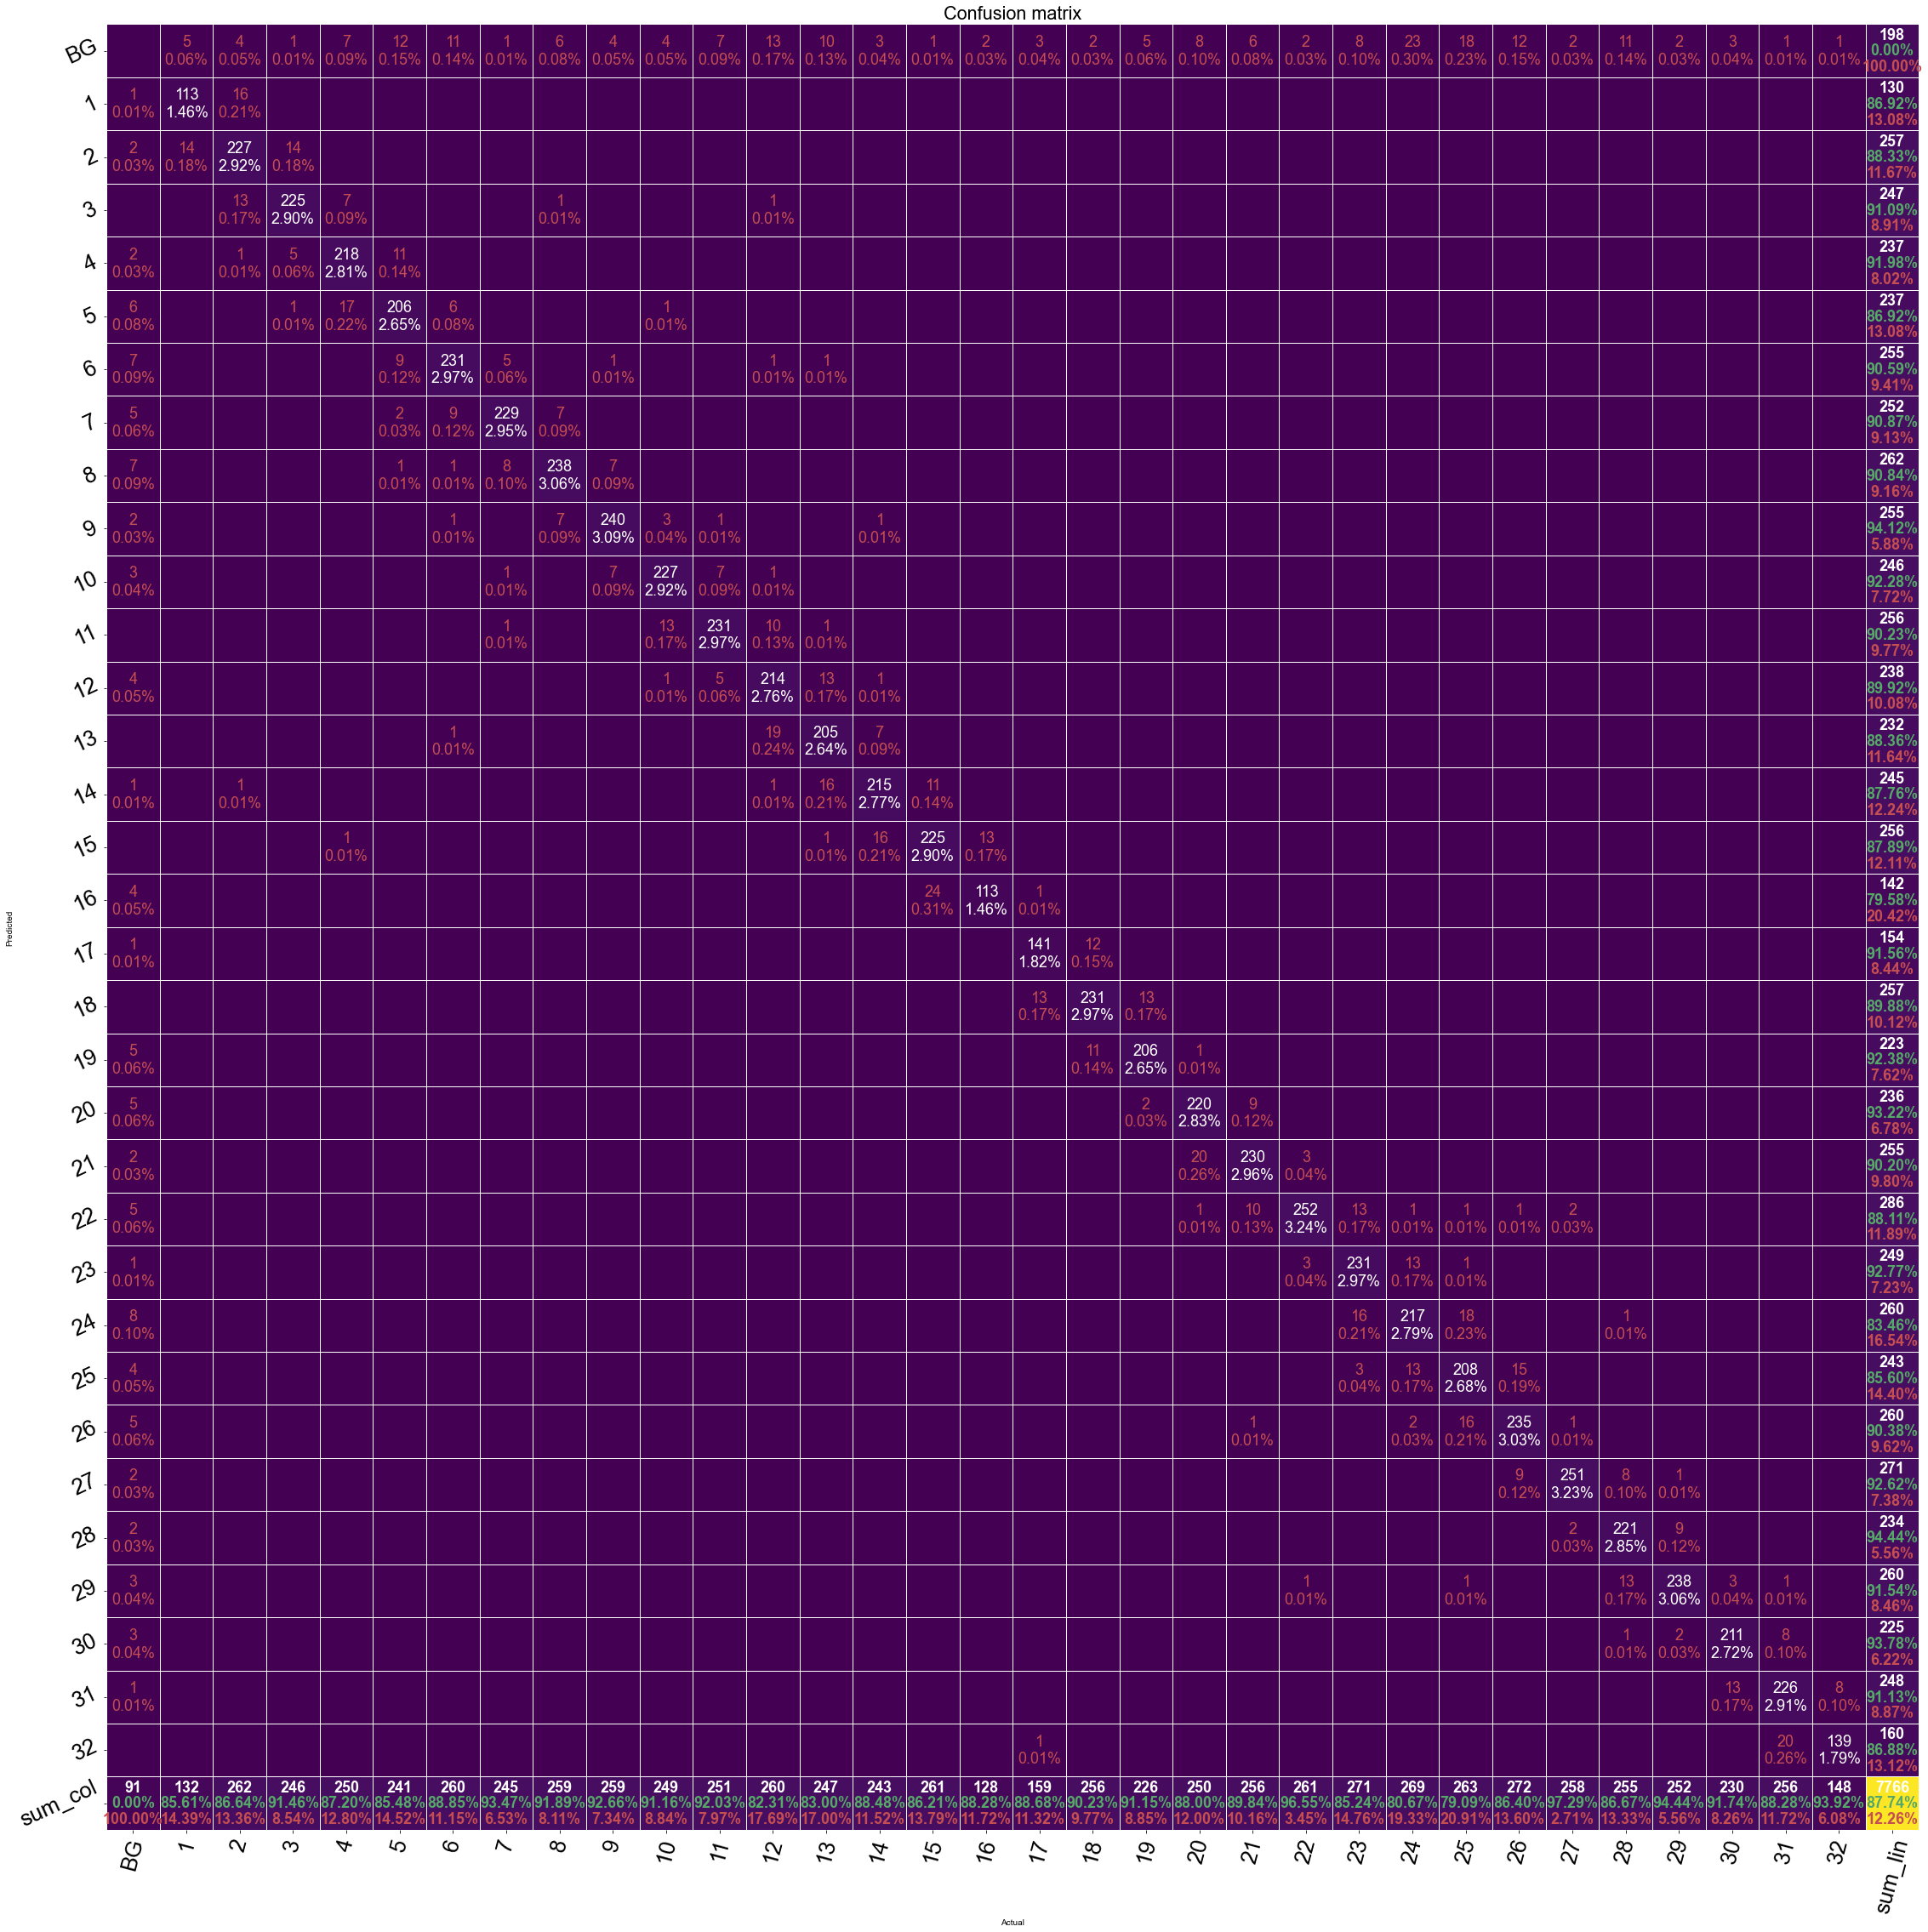

In [10]:
import pandas as pd
import numpy as np
import os 

#ground-truth and predictions lists
gt_tot = np.array([])
pred_tot = np.array([])
#mAP list
mAP_ = []

#compute gt_tot, pred_tot and mAP for each image in the test dataset
for image_id in dataset.image_ids:
    image, image_meta, gt_class_id, gt_bbox, gt_mask =\
        modellib.load_image_gt(dataset,  CustomConfig(), image_id, use_mini_mask=False)
    info = dataset.image_info[image_id]

    # Run the model
    results = model.detect([image], verbose=1)
    r = results[0]
    
    #compute gt_tot and pred_tot
    gt, pred = utils.gt_pred_lists(gt_class_id, gt_bbox, r['class_ids'], r['rois'])
    gt_tot = np.append(gt_tot, gt)
    pred_tot = np.append(pred_tot, pred)
    
    #precision_, recall_, AP_ 
    AP_, precision_, recall_, overlap_ = utils.compute_ap(gt_bbox, gt_class_id, gt_mask,
                                          r['rois'], r['class_ids'], r['scores'], r['masks'],iou_threshold=0.5)
    #check if the vectors len are equal
    print("the actual len of the gt vect is : ", len(gt_tot))
    print("the actual len of the pred vect is : ", len(pred_tot))
    
    mAP_.append(AP_)
    print("Average precision of this image : ",AP_)
    print("The actual mean average precision for the whole images (matterport methode) ", sum(mAP_)/len(mAP_))
    #print("Ground truth object : "+dataset.class_names[gt])
    #print("Predicted object : "+dataset.class_names[pred])

gt_tot=gt_tot.astype(int)
pred_tot=pred_tot.astype(int)
#save the vectors of gt and pred
save_dir = "output"
gt_pred_tot_json = {"gt_tot" : gt_tot, "pred_tot" : pred_tot}
df = pd.DataFrame(gt_pred_tot_json)
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
df.to_json(os.path.join(save_dir,"gt_pred_test.json"))
    
#print the confusion matrix and compute true postives, false positives and false negative for each class: 
#ps : you can controle the figure size and text format by choosing the right values
tp, fp, fn,confusion = utils.plot_confusion_matrix_from_data(gt_tot, pred_tot, dataset.class_names, fz=18, figsize=(32,32), lw=0.5)

In [12]:
np.set_printoptions(threshold=np.inf)
print(confusion)


[[  0   1   2   0   2   6   7   5   7   2   3   0   4   0   1   0   4   1
    0   5   5   2   5   1   8   4   5   2   2   3   3   1   0]
 [  5 113  14   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  4  16 227  13   1   0   0   0   0   0   0   0   0   0   1   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  1   0  14 225   5   1   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  7   0   0   7 218  17   0   0   0   0   0   0   0   0   0   1   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [ 12   0   0   0  11 206   9   2   1   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [ 11   0   0   0   0   6 231   9   1   1   0   0   0   1   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  1   0   0   0   0   0   5 229   8   0

In [14]:
np.savetxt('confusion_matrix.txt', confusion, fmt='%d')

In [15]:
accuracy=[]
accuracy=confusion.diagonal()/confusion.sum(axis=1)
accuracy=accuracy.reshape([1,33])

df = pd.DataFrame(accuracy,columns=dataset.class_names)
df.to_csv('accuracy.txt', sep='\t', index=False)

In [6]:
values = []
current_value = 0.0

while current_value <= 1.0:
    values.append(current_value)
    current_value += 0.1

print(values)

[0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6, 0.7, 0.7999999999999999, 0.8999999999999999, 0.9999999999999999]


In [9]:
def compute_batch_ap(image_ids,iou_threshold):
    APs = []
    ARs=[]
    Precisions=[]
    #list_iou_thresholds = np.arange(0.5, 1.01, 0.1)

    for image_id in image_ids:
        # Load image
        image, image_meta, gt_class_id, gt_bbox, gt_mask =\
            modellib.load_image_gt(dataset,CustomConfig(),
                                   image_id, use_mini_mask=False)
        # Run object detection
        results = model.detect([image], verbose=0)
        # Compute AP
        r = results[0]
        AP, precisions, recalls, overlaps =\
            utils.compute_ap(gt_bbox, gt_class_id, gt_mask,
                              r['rois'], r['class_ids'], r['scores'], r['masks'],iou_threshold)
        APs.append(AP)
        Precisions.append(precisions)
        AR,positive_ids = utils.compute_recall(r['rois'], gt_bbox,iou=iou_threshold)
        ARs.append(AR)
        #visualize.plot_precision_recall(AP, precisions, recalls)
    mAP=np.mean(APs)
    mAR=np.mean(ARs)
    F1=2 * ((mAP * mAR) / (mAP + mAR))
    #visualize.plot_precision_recall(mAP, precisions, recalls)
    return APs,ARs,F1,Precisions

# Pick a set of random images.


In [10]:
image_ids = dataset.image_ids
mAP=[]
for value in values:
    APs,ARs,F1,Precisions = compute_batch_ap(image_ids,value)
    mAP.append(np.mean(APs))
print(mAP)

[0.9395935898273449, 0.9081008266766855, 0.9055324149484515, 0.9042506172391342, 0.9013459744566006, 0.8945733931170007, 0.8636348251150943, 0.7332454721654591, 0.33327422664777434, 0.008956838805772256, 0.0]


C:\Users\HP\.conda\envs\mrcnn4\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in double_scalars


In [11]:
auc=np.trapz(mAP, values)
print(auc)

0.6922711384085644


(0.0, 1.0)

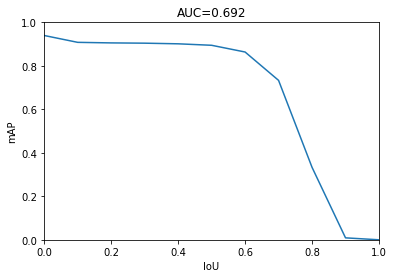

In [13]:
plt.plot(values, mAP)
plt.xlabel('IoU')
plt.ylabel('mAP')
plt.title('AUC=0.692')
plt.xlim(0, 1)
plt.ylim(0, 1)